## Seaborn

- 엄청나게 화려한 시각화 기법들을 제공하며, 기본적으로 이쁩니다.
>  histplot, barplot, jointplot, lineplot, ...


- pandas DataFrame과 매우 호환이 잘 됩니다.

  >  e.g. sns.xxxplot(data=df)    **<--- 기본세팅!**

In [4]:
# 라이브러리와 데이터를 불러오고, 시각화를 위한 세팅을 합니다.
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

In [5]:
# 버전 확인
print(sns.__version__)
print(matplotlib.__version__)

0.12.0
3.5.3


In [14]:
# 펭귄 데이터 임포트
data = sns.load_dataset("penguins")
data

# 간단한 전처리
data = data.dropna()
# data[data.isnull().any(axis=1)]
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Histplot 

- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.


- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

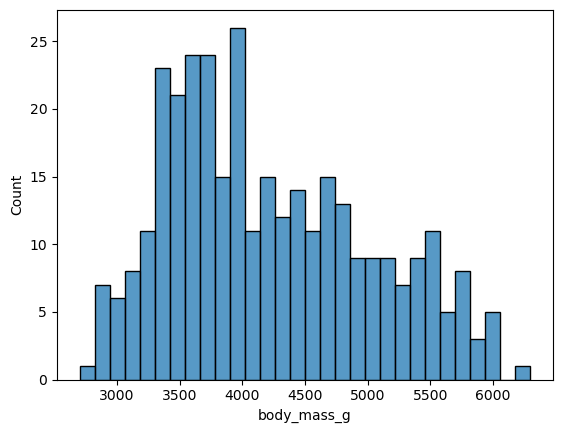

In [26]:
sns.histplot(data=data, x="body_mass_g", bins=30)

/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


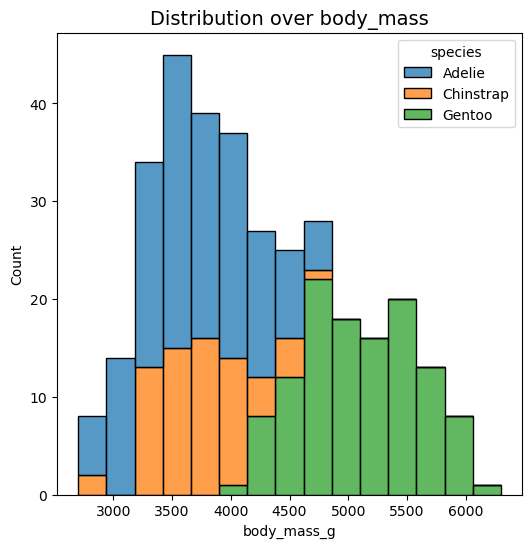

In [25]:
# penguin 데이터에 histplot을 출력합니다.
plt.figure(figsize=(6, 6))
plt.title("Distribution over body_mass", fontsize=14)
sns.histplot(data=data, x="body_mass_g", bins=15, hue="species", multiple="stack") 
plt.show()

### Displot 

- distribution들을 여러 subplot들로 나눠서 출력해주는 plot.


- displot에 kind를 변경하는 것으로, histplot, kdeplot, ecdfplot 모두 출력이 가능합니다.

e.g. displot(kind="hist")

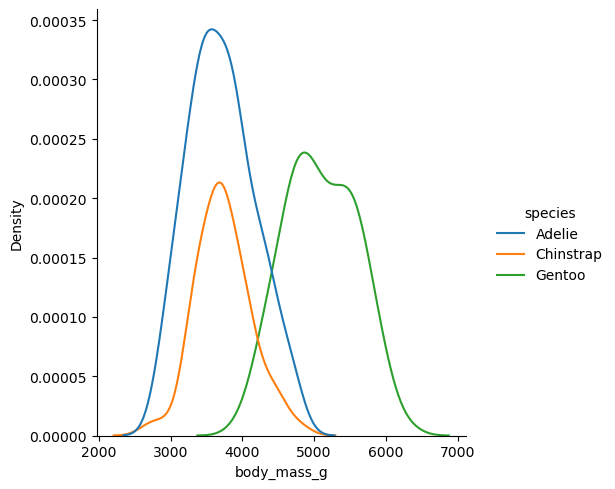

In [27]:
# penguin 데이터에 displot을 출력합니다.
sns.displot(data=data, kind="kde", x="body_mass_g", hue="species") # kde = 밀도함수

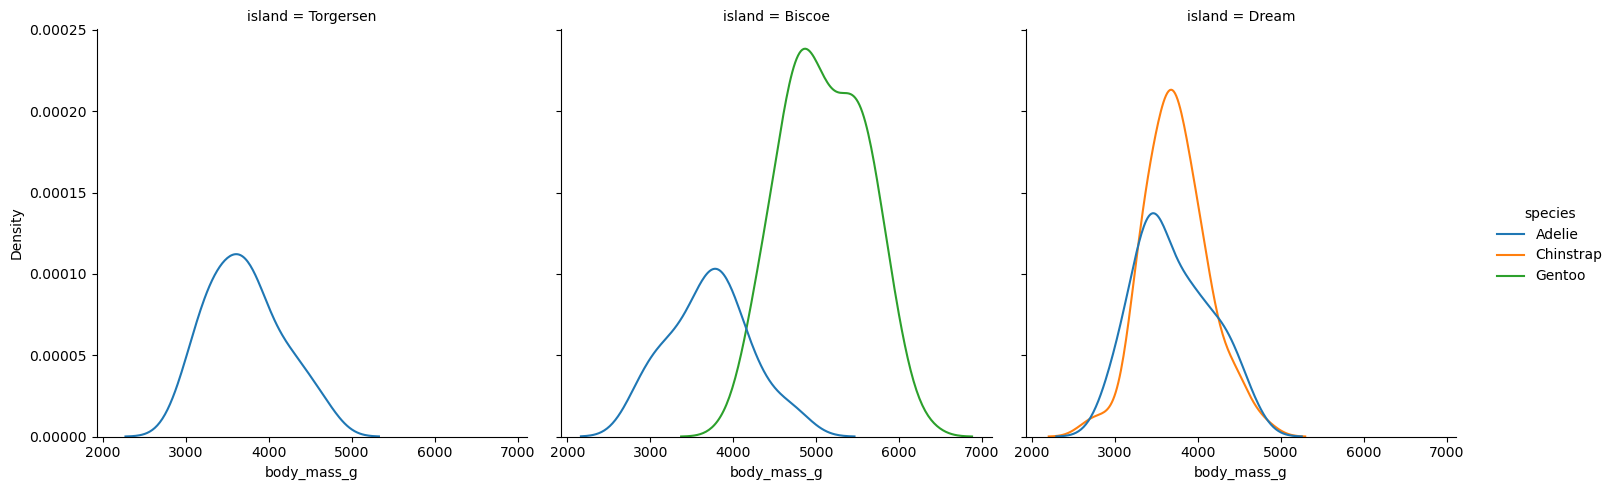

In [30]:
# penguin 데이터에 displot을 출력합니다.
sns.displot(data=data, kind="kde", x="body_mass_g", hue="species", col="island") # col 대신 row 도 사용 가능

### Barplot

- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

<function matplotlib.pyplot.show(close=None, block=None)>

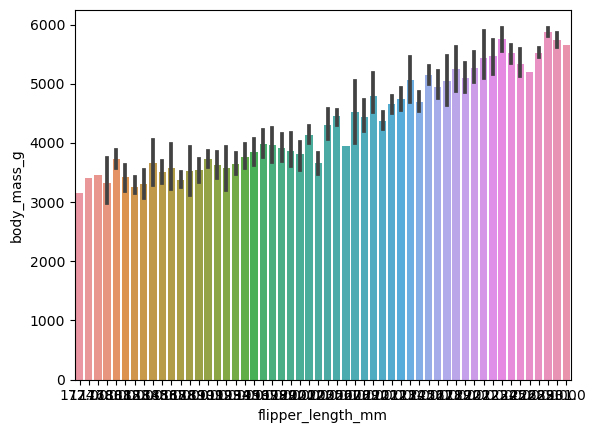

In [31]:
# penguin 데이터에 barplot을 출력합니다.
sns.barplot(data=data, x="flipper_length_mm", y="body_mass_g")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

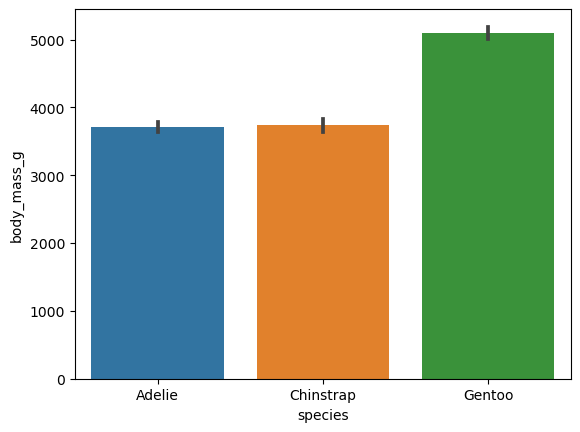

In [32]:
# penguin 데이터에 barplot을 출력합니다.
sns.barplot(data=data, x="species", y="body_mass_g")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

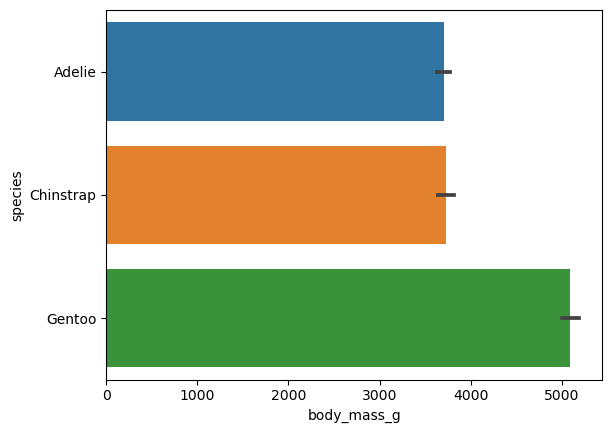

In [35]:
# penguin 데이터에 barplot을 출력합니다.
sns.barplot(data=data, x="body_mass_g", y="species") # 검은색 바 같은 건 에러구간 표시!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

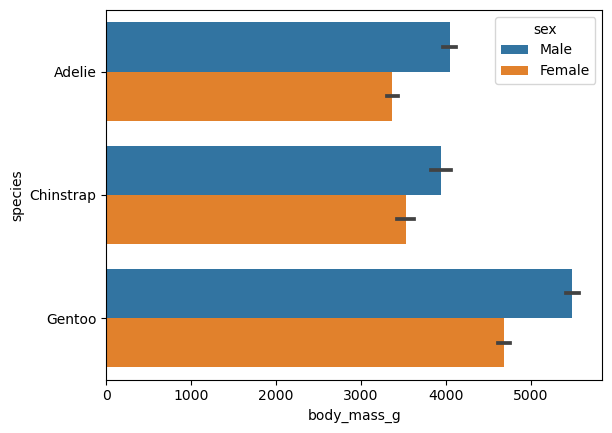

In [36]:
# penguin 데이터에 barplot을 출력합니다.
sns.barplot(data=data, x="body_mass_g", y="species", hue="sex")
plt.show

### Countplot

- 범주형 속성을 가지는 데이터들의 histogram을 보여주는 plot.



- 종류별 count를 보여주는 방법입니다.

<function matplotlib.pyplot.show(close=None, block=None)>

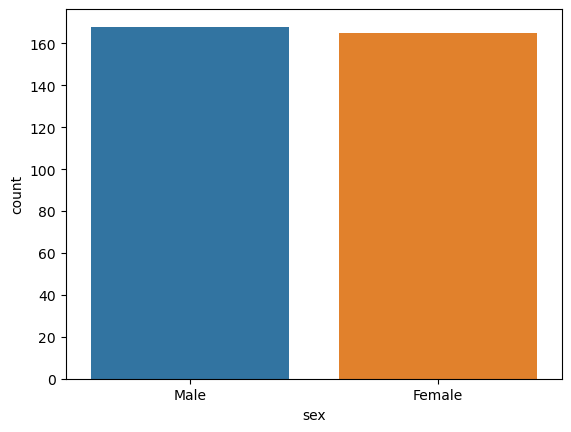

In [37]:
# penguin 데이터에 countplot을 출력합니다.
sns.countplot(data=data, x="sex") # countplot 도 numeric 데이터 보다는 카테고리 데이터를 사용하자!
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

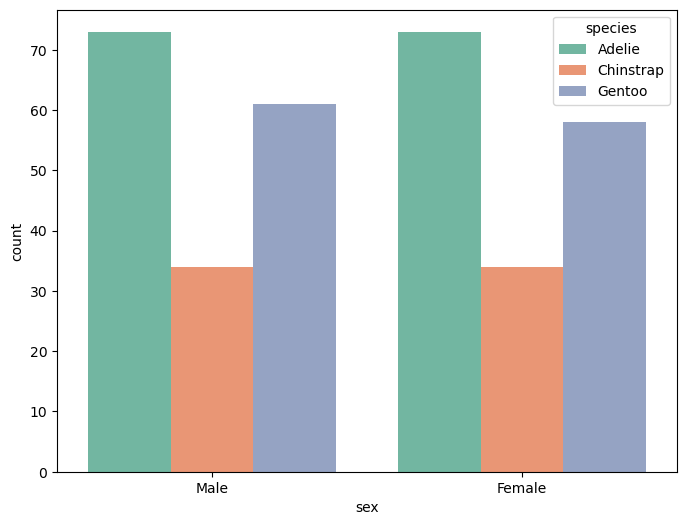

In [40]:
# penguin 데이터에 countplot을 출력합니다.
plt.figure(figsize=(8, 6))
sns.set_palette("Set2") # 다양한 테마 설정 가능!
sns.countplot(data=data, x="sex", hue="species") # countplot 도 numeric 데이터 보다는 카테고리 데이터를 사용하자!
plt.show

### Boxplot


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quantile Range)

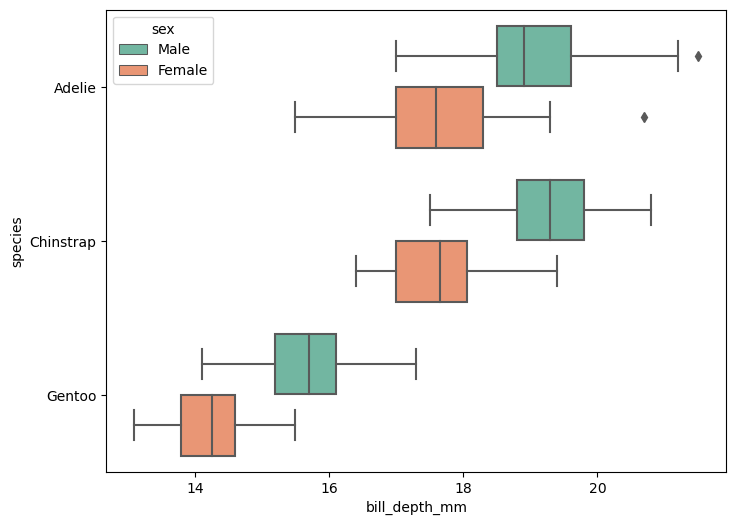

In [45]:
# penguin 데이터에 boxplot을 출력합니다.
plt.figure(figsize=(8, 6))
sns.set_palette("Set2")
sns.boxplot(data=data, y="species", x="bill_depth_mm", hue="sex") # y < > x 가능
plt.show()
# What is boxplot?

### Violinplot 

- 데이터에 대한 분포 자체를 보여주는 plot.


- boxplot과 비슷하지만, 전체 분포에 대한 그림을 보여준다는 점에서 boxplot과 다릅니다.


- 보통 boxplot과 함께 표시하면, 평균 근처에 데이터가 얼마나 있는지(boxplot) 전체적으로 어떻게 퍼져있는지(violinplot) 모두 확인이 가능합니다.

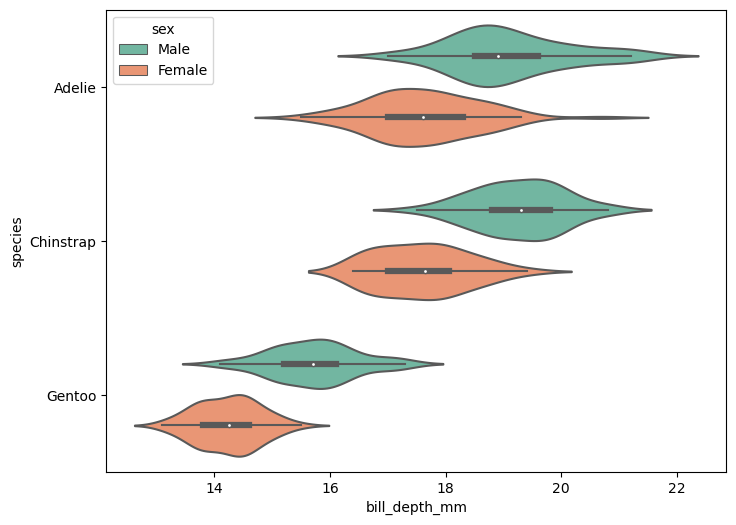

In [46]:
# penguin 데이터에 violinplot을 출력합니다.
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, y="species", x="bill_depth_mm", hue="sex")
plt.show()

### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

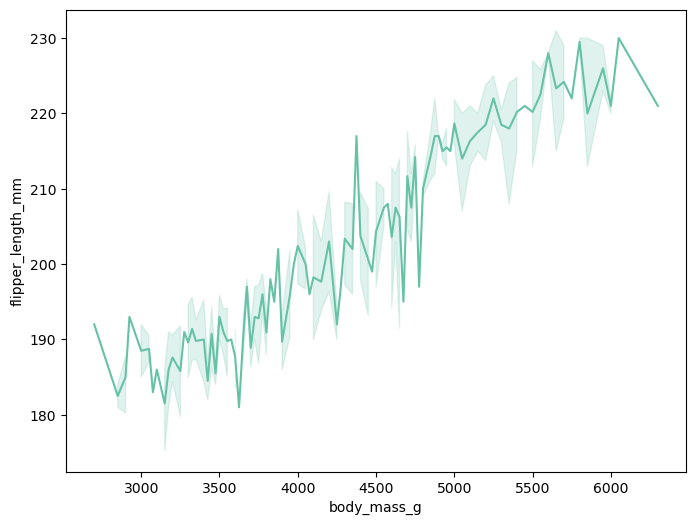

In [49]:
# penguin 데이터에 lineplot을 출력합니다.
# 백그라운드는 에러, a.k.a CI
plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x="body_mass_g", y="flipper_length_mm")
plt.show()

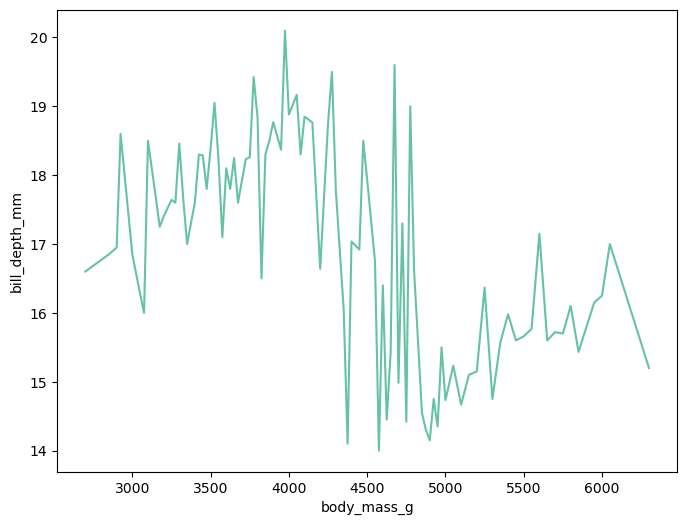

In [54]:
# penguin 데이터에 lineplot을 출력합니다.
# 백그라운드는 에러, a.k.a CI, 출력 안할 수도 있음
# ci=None은 deprecated 된 표현 법, errorbar=None 을 사용하자!
plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x="body_mass_g", y="bill_depth_mm", errorbar=None)
plt.show()

### Pointplot

- 특정 수치 데이터를 error bar와 함께 출력해주는 plot.



- 수치 데이터를 다양한 각도에서 한 번에 바라보고 싶을 때 사용합니다.


- 데이터와 error bar를 한 번에 찍어주기 때문에, 살펴보고 싶은 특정 지표들만 사용하는 것이 좋습니다.

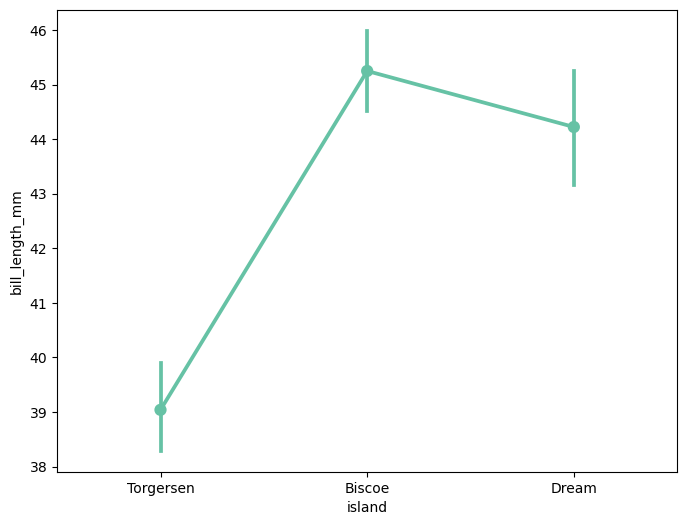

In [57]:
# penguin 데이터에 pointplot을 출력합니다.
plt.figure(figsize=(8, 6))
sns.pointplot(data=data, x="island", y="bill_length_mm")
plt.show()

### Scatterplot

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

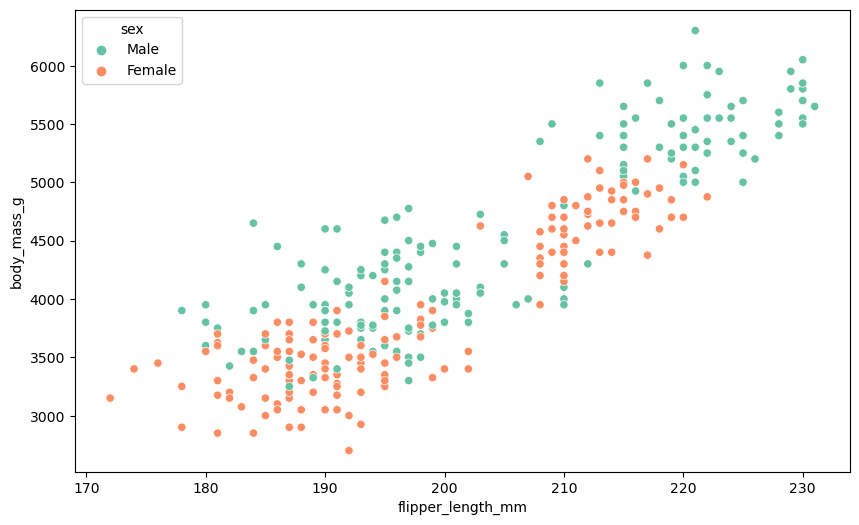

In [64]:
# penguin 데이터에 scatterplot을 출력합니다.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="flipper_length_mm", y="body_mass_g", hue="sex")
plt.show()

### Pairplot


- 주어진 데이터의 각 feature들 사이의 관계를 표시하는 Plot.


- scatterplot, FacetGrid, kdeplot을 이용하여 feature간의 관계를 잘 보여줍니다.


- 각 feature에 대해 계산된 모든 결과를 보여주기 때문에, feature가 많은 경우 사용하기 적합하지 않습니다.

<Figure size 1000x1000 with 0 Axes>

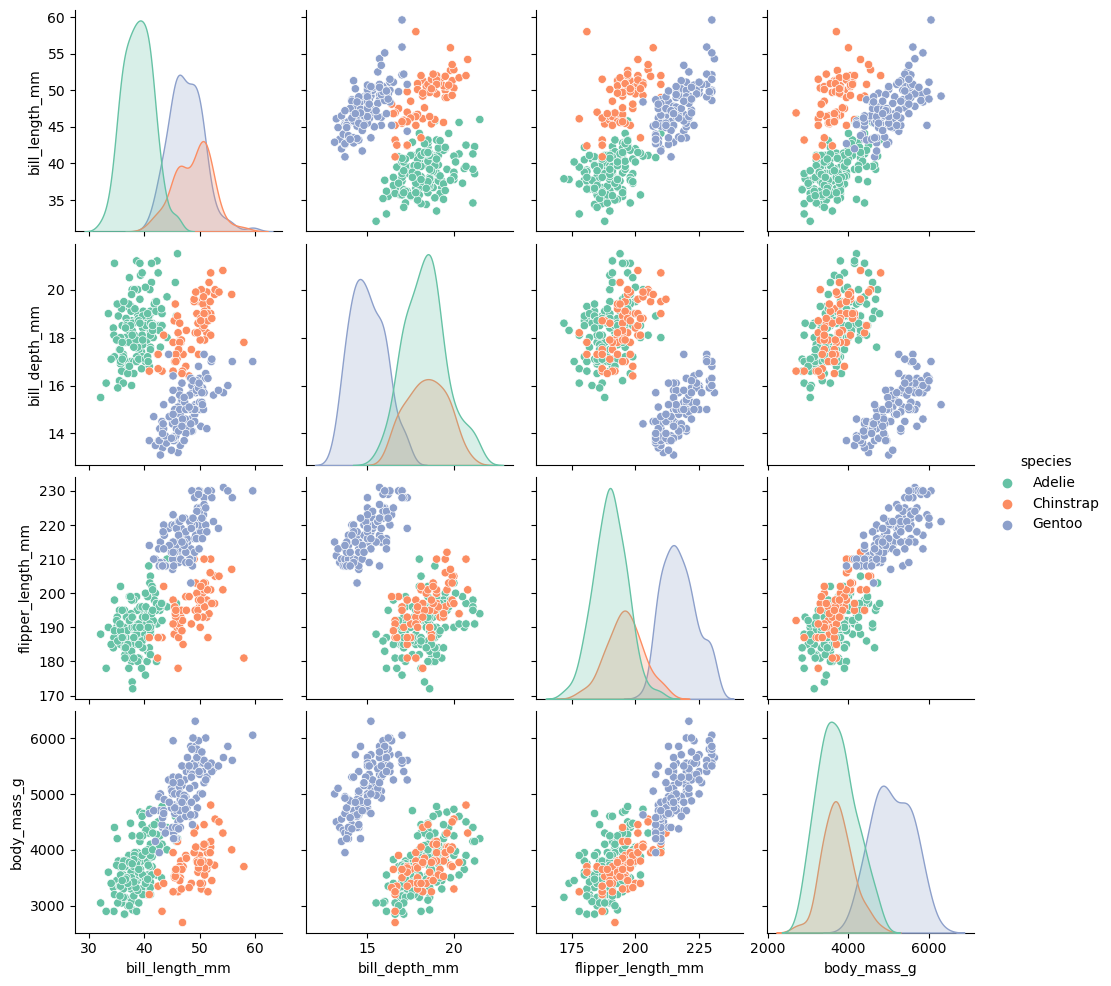

In [66]:
# penguin 데이터에 pairplot을 출력합니다.
plt.figure(figsize=(10, 10))
sns.pairplot(data=data, hue="species")
plt.show()

### Heatmap

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

**상관관계란?**
- 어떤 X값의 변화에 따라 Y값의 선형적으로 변화하는지를 측정한 지표.

- [-1, 1]


e.g. 아이스크림 판매량 증가 <----> 상어에 물린 사람 수

In [67]:
# 각 feature간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.
corr = data.corr()
corr

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_23618/493223888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


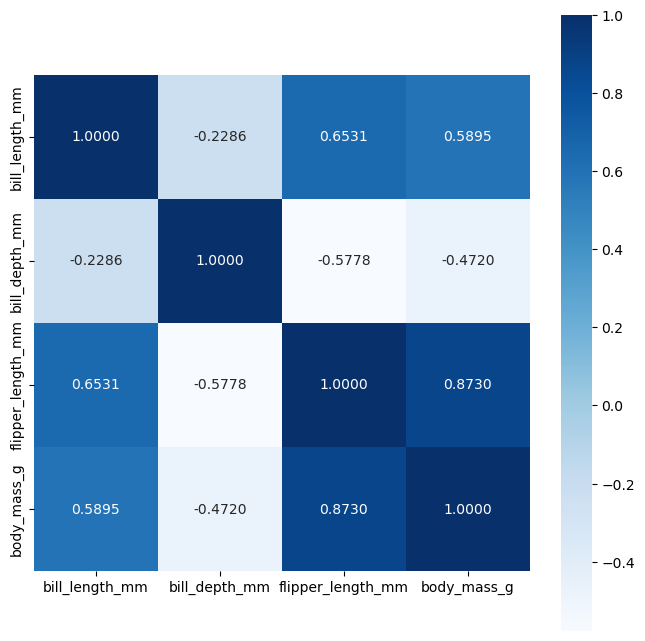

In [74]:
# penguin 데이터에 heatmap을 출력합니다.
plt.figure(figsize=(8, 8))
sns.heatmap(data=corr, square=True, cmap="Blues", annot=True, fmt=".4f")
plt.show()